# Anscombe's quartet

Anscome’s Quartet  [*"Graphs in Statistical Analysis" Anscombe, F. J. (1973)*](https://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf) is a set of four distinct data sets each consisting of 11 `(x,y)` pairs where each dataset produces the same summary statistics: 

| Property | Value | Accuracy |
| :- |:-------------: | -: |
| Mean of x | 9 | exact |
| Sample variance of x : $\sigma^{2}$ | 11 | exact |
| Mean of y |	7.50 | to 2 decimal places |
| Sample variance of y : $\sigma^{2}$ | 4.125 | ±0.003 |
| Correlation between x and y |	0.816 | to 3 decimal places |
| Linear regression line | $\small{y=3.00+0.500x}$ |	to 2 and 3 decimal places, respectively |
| Coefficient of determination of the linear regression : $R^{2}$ | 0.67 |	to 2 decimal places |


Along this notebook we will be computing statics over the Anscombe's quartet data set and visualizing it.  

## Reading the data
We will first load Anscombe data set using pandas [`read_csv(...)`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method. The dataset consists on 44 rows and 3 columns corresponding to `x`,`y` pairs and a `dataset` field indicating the data set index (`I/II/III/IV`) the pair beolongs to. Let's take a look at it:

In [17]:
import pandas as pd          # import pandas
import seaborn as sns        # import seaborn, we will be using anscombe dataset and sns.FacetGrid

pd.set_option("max_rows", 8)              # only display up to 8 rows when printing dataframes (reduce visual clutter)
anscome_df = sns.load_dataset("anscombe") # load anscombe dataset from seaborn
anscome_df['x'] = anscome_df['x'].astype(float)
anscome_df['y'] = anscome_df['y'].astype(float)
anscome_df                                # check data has been loaded

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
...,...,...,...
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


## Visualizing quartets

In order to visually inspect the Anscombe dataset, let's plot quartets using scatterplots from [matplotlib](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html) and multi-plot grids from [seaborn](https://seaborn.pydata.org/tutorial/axis_grids.html). Despite the quartet share the same aforementioned statistics, notice how different the plots are from each other.

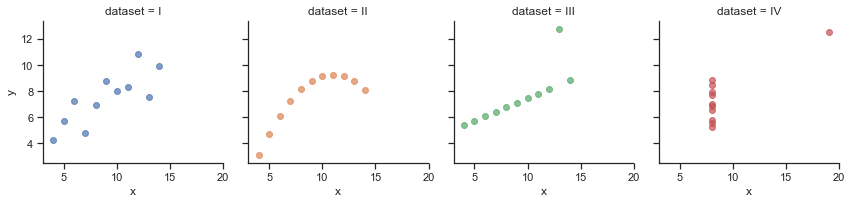

In [18]:
import matplotlib.pyplot as plt  # import pyplot to create scatter plots
sns.set(style="ticks")

g = sns.FacetGrid(anscome_df, col="dataset", hue="dataset") # define a grid of plots. Each element shows a different memeber from the quartet in a different column and color
g.map(plt.scatter, "x", "y", alpha=.7)                      # render scatterplots

## Computing statistics
Now, lets verify statics are shared among all partitions in the quartet dataset.

In [19]:
dataset_labels = ('I','II','III','IV') # labels for each dataset

# First, compute mean
mean_of_xy = {q: anscome_df[anscome_df['dataset'] == q].mean() for q in dataset_labels}

# Second, compute variances 
var_of_xy  = {q: anscome_df[anscome_df['dataset'] == q].var() for q in dataset_labels}

# Third, compute correlation between x and y
corr_of_xy = {q: anscome_df[anscome_df['dataset'] == q]['x'].corr(anscome_df[anscome_df['dataset'] == q]['y']) for q in dataset_labels}

## Linear regression
Finally, we perform a linear regression over each point set. We will be using the [`LinearRegression().fit(X,y)`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) method from [scikit-learn](https://scikit-learn.org/stable/index.html)

In [ ]:
from sklearn.linear_model import LinearRegression

# Fit the data. Notice
reg_of_xy = {q: LinearRegression().fit(anscome_df[anscome_df['dataset'] == q]['x'].values.reshape(-1, 1),
                                       anscome_df[anscome_df['dataset'] == q]['y'].values.reshape(-1, 1)) 
                                       for q in dataset_labels}

# Compute the coefficient of determination R^2 of the prediction
coef_of_xy = {q: reg_of_xy[q].score(anscome_df[anscome_df['dataset'] == q]['x'].values.reshape(-1, 1),
                                    anscome_df[anscome_df['dataset'] == q]['y'].values.reshape(-1, 1)) 
                                    for q in dataset_labels}

In [ ]:
# Show the results of a linear regression within each dataset
sns.set(style="ticks")
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscome_df,
           col_wrap=4, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": .7})